In [11]:
! pip install -r requirements.txt

INFO: pip is looking at multiple versions of tensorflow-intel to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Using cached scikeras-0.13.0-py3-none-any.whl.metadata (3.1 kB)

The conflict is caused by:
    The user requested keras==3.2.1
    scikeras 0.13.0 depends on keras>=3.2.0
    tensorflow-intel 2.15.0 depends on keras<2.16 and >=2.15.0

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict



ERROR: Cannot install -r requirements.txt (line 2), keras==3.2.1 and tensorflow-intel==2.15.0 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

def dataset(file_name:str = ''):
  return f'dataset/{file_name}'

In [2]:
import os

print(os.listdir(dataset()))

['corrected.gz', 'dataset.csv', 'kddcup.data.gz', 'kddcup.data_10_percent.gz', 'kddcup.names', 'kddcup.newtestdata_10_percent_unlabeled.gz', 'kddcup.testdata.unlabeled.gz', 'kddcup.testdata.unlabeled_10_percent.gz', 'test_dataset.csv', 'training_attack_types', 'typo-correction.txt']


In [3]:
with open(dataset("kddcup.names"),'r') as f:
  names = f.read()
  features = [name.split(':')[0].strip() for name in names.split('.')][1:-1] + ['target']

len(features) , features

(42,
 ['duration',
  'protocol_type',
  'service',
  'flag',
  'src_bytes',
  'dst_bytes',
  'land',
  'wrong_fragment',
  'urgent',
  'hot',
  'num_failed_logins',
  'logged_in',
  'num_compromised',
  'root_shell',
  'su_attempted',
  'num_root',
  'num_file_creations',
  'num_shells',
  'num_access_files',
  'num_outbound_cmds',
  'is_host_login',
  'is_guest_login',
  'count',
  'srv_count',
  'serror_rate',
  'srv_serror_rate',
  'rerror_rate',
  'srv_rerror_rate',
  'same_srv_rate',
  'diff_srv_rate',
  'srv_diff_host_rate',
  'dst_host_count',
  'dst_host_srv_count',
  'dst_host_same_srv_rate',
  'dst_host_diff_srv_rate',
  'dst_host_same_src_port_rate',
  'dst_host_srv_diff_host_rate',
  'dst_host_serror_rate',
  'dst_host_srv_serror_rate',
  'dst_host_rerror_rate',
  'dst_host_srv_rerror_rate',
  'target'])

In [4]:
attack_types = {'normal': 'normal'}
with open(dataset("training_attack_types"),'r') as f:
  types = f.read()
  attack_types.update({t.split(' ')[0]: t.split(' ')[1] for t in types.split('\n')[:-2]})
len(attack_types), attack_types

(23,
 {'normal': 'normal',
  'back': 'dos',
  'buffer_overflow': 'u2r',
  'ftp_write': 'r2l',
  'guess_passwd': 'r2l',
  'imap': 'r2l',
  'ipsweep': 'probe',
  'land': 'dos',
  'loadmodule': 'u2r',
  'multihop': 'r2l',
  'neptune': 'dos',
  'nmap': 'probe',
  'perl': 'u2r',
  'phf': 'r2l',
  'pod': 'dos',
  'portsweep': 'probe',
  'rootkit': 'u2r',
  'satan': 'probe',
  'smurf': 'dos',
  'spy': 'r2l',
  'teardrop': 'dos',
  'warezclient': 'r2l',
  'warezmaster': 'r2l'})

In [5]:
import pandas as pd

df = pd.read_csv(dataset('kddcup.data.gz'),names=features)

df['benign'] = df.target.apply(lambda r: 1 if (r[:-1]=='normal') else 0)
df['Attack Type'] = df.target.apply(lambda r:attack_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,benign,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.,1,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.,1,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.,1,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.,1,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.,1,normal


In [6]:
df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,benign,Attack Type
4898426,0,tcp,http,SF,212,2288,0,0,0,0,...,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.,1,normal
4898427,0,tcp,http,SF,219,236,0,0,0,0,...,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.,1,normal
4898428,0,tcp,http,SF,218,3610,0,0,0,0,...,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.,1,normal
4898429,0,tcp,http,SF,219,1234,0,0,0,0,...,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.,1,normal
4898430,0,tcp,http,SF,219,1098,0,0,0,0,...,0.0,0.14,0.05,0.0,0.01,0.0,0.0,normal.,1,normal


# Visualize Dataset

In [35]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

target
smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: count, dtype: int64


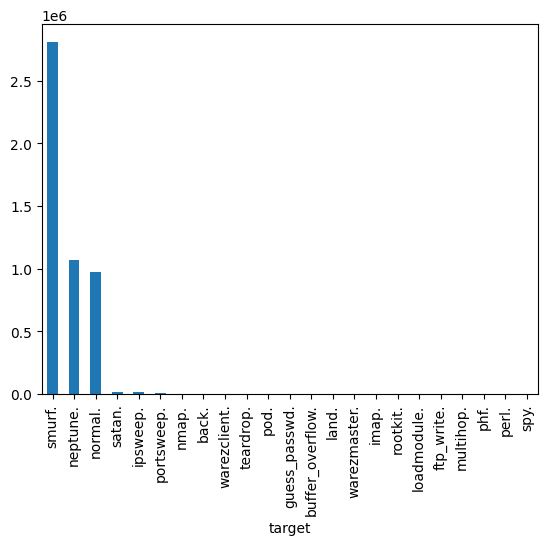

In [7]:
print(df['target'].value_counts())
bar_graph('target')

Attack Type
dos       3883370
normal     972781
probe       41102
r2l          1126
u2r            52
Name: count, dtype: int64


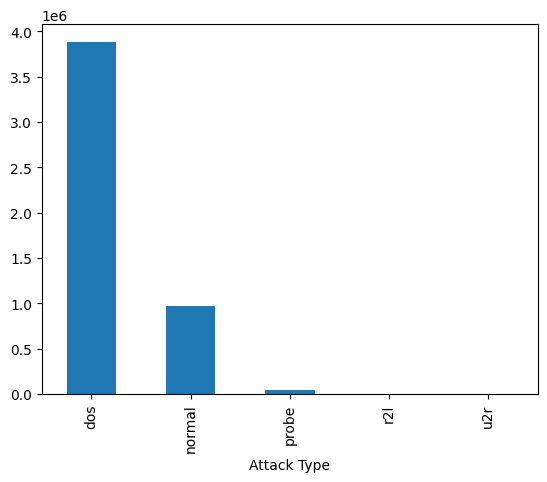

In [17]:
print(df['Attack Type'].value_counts())
bar_graph('Attack Type')

In [9]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['protocol_type', 'service', 'flag']

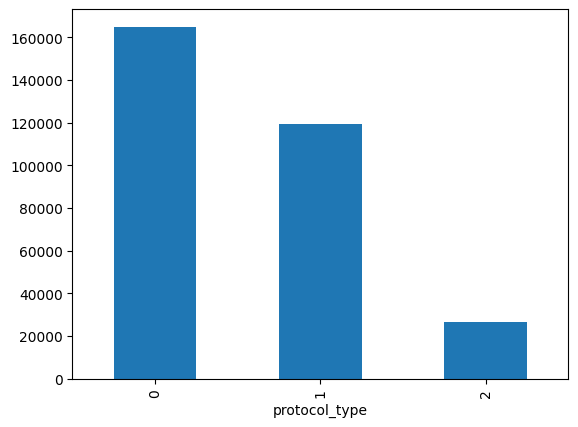

In [36]:
bar_graph('protocol_type')

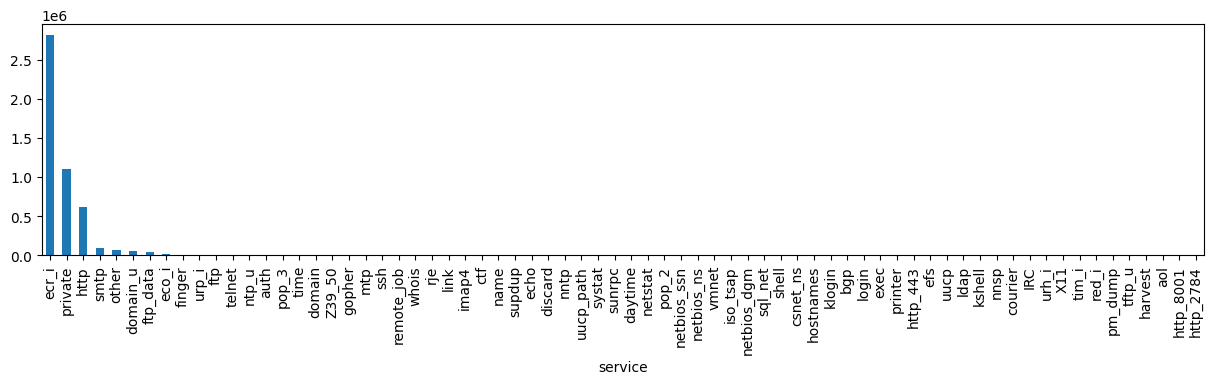

In [21]:
plt.figure(figsize=(15,3))
bar_graph('service')

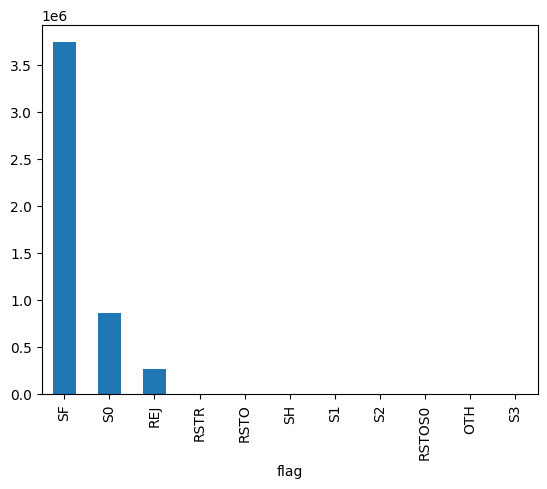

In [22]:
bar_graph('flag')

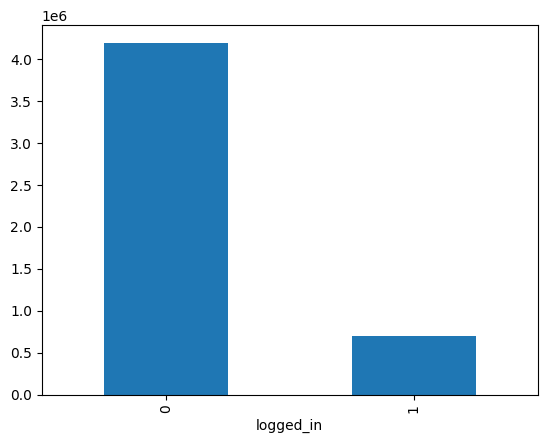

In [23]:
bar_graph('logged_in')

logged_in (1 if successfully logged in; 0 otherwise): We notice that just 70000 packets are successfully logged in.

In [8]:
len(df.columns)

43

# Data Cleaning

In [6]:
df = df.dropna(axis='columns')# drop columns with NaN

In [7]:
{col:df[col].nunique() for col in df}

{'duration': 9883,
 'protocol_type': 3,
 'service': 70,
 'flag': 11,
 'src_bytes': 7195,
 'dst_bytes': 21493,
 'land': 2,
 'wrong_fragment': 3,
 'urgent': 6,
 'hot': 30,
 'num_failed_logins': 6,
 'logged_in': 2,
 'num_compromised': 98,
 'root_shell': 2,
 'su_attempted': 3,
 'num_root': 93,
 'num_file_creations': 42,
 'num_shells': 3,
 'num_access_files': 10,
 'num_outbound_cmds': 1,
 'is_host_login': 2,
 'is_guest_login': 2,
 'count': 512,
 'srv_count': 512,
 'serror_rate': 96,
 'srv_serror_rate': 87,
 'rerror_rate': 89,
 'srv_rerror_rate': 76,
 'same_srv_rate': 101,
 'diff_srv_rate': 95,
 'srv_diff_host_rate': 72,
 'dst_host_count': 256,
 'dst_host_srv_count': 256,
 'dst_host_same_srv_rate': 101,
 'dst_host_diff_srv_rate': 101,
 'dst_host_same_src_port_rate': 101,
 'dst_host_srv_diff_host_rate': 76,
 'dst_host_serror_rate': 101,
 'dst_host_srv_serror_rate': 100,
 'dst_host_rerror_rate': 101,
 'dst_host_srv_rerror_rate': 101,
 'target': 23,
 'benign': 2,
 'Attack Type': 5}

In [8]:
df = df[[col for col in df if df[col].nunique() > 1]]

In [9]:
df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,benign,Attack Type
4898426,0,tcp,http,SF,212,2288,0,0,0,0,...,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.,1,normal
4898427,0,tcp,http,SF,219,236,0,0,0,0,...,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.,1,normal
4898428,0,tcp,http,SF,218,3610,0,0,0,0,...,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.,1,normal
4898429,0,tcp,http,SF,219,1234,0,0,0,0,...,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.,1,normal
4898430,0,tcp,http,SF,219,1098,0,0,0,0,...,0.0,0.14,0.05,0.0,0.01,0.0,0.0,normal.,1,normal


In [10]:
test_df = pd.read_csv(dataset('corrected.gz'),names=features)

In [11]:
set(test_df.target) - set(df.target)

{'apache2.',
 'httptunnel.',
 'mailbomb.',
 'mscan.',
 'named.',
 'processtable.',
 'ps.',
 'saint.',
 'sendmail.',
 'snmpgetattack.',
 'snmpguess.',
 'sqlattack.',
 'udpstorm.',
 'worm.',
 'xlock.',
 'xsnoop.',
 'xterm.'}

In [12]:
attack_types['apache2'] = 'dos'
attack_types['mailbomb'] = 'dos'
attack_types['processtable'] = 'dos'
attack_types['udpstorm'] = 'dos'
attack_types['named'] = 'r2l'
attack_types['sendmail'] = 'r2l'
attack_types['snmpgetattack'] = 'r2l'
attack_types['snmpguess'] = 'r2l'
attack_types['worm'] = 'r2l'
attack_types['xsnoop'] = 'r2l'
attack_types['xlock'] = 'r2l'
attack_types['httptunnel'] = 'u2r'
attack_types['xterm'] = 'u2r'
attack_types['sqlattack'] = 'u2r'
attack_types['ps'] = 'u2r'
attack_types['saint'] = 'probe'
attack_types['mscan'] = 'probe'

In [13]:
test_df['benign'] = test_df.target.apply(lambda r: 1 if (r[:-1]=='normal') else 0)
test_df['Attack Type'] = test_df.target.apply(lambda r:attack_types[r[:-1]])
test_df = test_df[df.columns]
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,benign,Attack Type
0,0,udp,private,SF,105,146,0,0,0,0,...,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.,1,normal
1,0,udp,private,SF,105,146,0,0,0,0,...,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.,1,normal
2,0,udp,private,SF,105,146,0,0,0,0,...,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.,1,normal
3,0,udp,private,SF,105,146,0,0,0,0,...,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,0,r2l
4,0,udp,private,SF,105,146,0,0,0,0,...,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,0,r2l


In [14]:
from sklearn.preprocessing import LabelEncoder

combined_df = pd.concat([df, test_df], ignore_index=True)

label_encoders = {}

string_categorical_columns = ['Attack Type', 'protocol_type', 'flag', 'service', 'target']
for column in string_categorical_columns:
	label_encoders[column] = LabelEncoder()
	combined_df[column] = label_encoders[column].fit_transform(combined_df[column])
	print(column, label_encoders[column].classes_)

df = combined_df.iloc[:len(df)]
test_df = combined_df.iloc[len(df):]

df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

del combined_df

Attack Type ['dos' 'normal' 'probe' 'r2l' 'u2r']
protocol_type ['icmp' 'tcp' 'udp']
flag ['OTH' 'REJ' 'RSTO' 'RSTOS0' 'RSTR' 'S0' 'S1' 'S2' 'S3' 'SF' 'SH']
service ['IRC' 'X11' 'Z39_50' 'aol' 'auth' 'bgp' 'courier' 'csnet_ns' 'ctf'
 'daytime' 'discard' 'domain' 'domain_u' 'echo' 'eco_i' 'ecr_i' 'efs'
 'exec' 'finger' 'ftp' 'ftp_data' 'gopher' 'harvest' 'hostnames' 'http'
 'http_2784' 'http_443' 'http_8001' 'icmp' 'imap4' 'iso_tsap' 'klogin'
 'kshell' 'ldap' 'link' 'login' 'mtp' 'name' 'netbios_dgm' 'netbios_ns'
 'netbios_ssn' 'netstat' 'nnsp' 'nntp' 'ntp_u' 'other' 'pm_dump' 'pop_2'
 'pop_3' 'printer' 'private' 'red_i' 'remote_job' 'rje' 'shell' 'smtp'
 'sql_net' 'ssh' 'sunrpc' 'supdup' 'systat' 'telnet' 'tftp_u' 'tim_i'
 'time' 'urh_i' 'urp_i' 'uucp' 'uucp_path' 'vmnet' 'whois']
target ['apache2.' 'back.' 'buffer_overflow.' 'ftp_write.' 'guess_passwd.'
 'httptunnel.' 'imap.' 'ipsweep.' 'land.' 'loadmodule.' 'mailbomb.'
 'mscan.' 'multihop.' 'named.' 'neptune.' 'nmap.' 'normal.' 'perl.

In [15]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,benign,Attack Type
0,0,1,24,9,215,45076,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,16,1,1
1,0,1,24,9,162,4528,0,0,0,0,...,0.0,1.00,0.0,0.0,0.0,0.0,0.0,16,1,1
2,0,1,24,9,236,1228,0,0,0,0,...,0.0,0.50,0.0,0.0,0.0,0.0,0.0,16,1,1
3,0,1,24,9,233,2032,0,0,0,0,...,0.0,0.33,0.0,0.0,0.0,0.0,0.0,16,1,1
4,0,1,24,9,239,486,0,0,0,0,...,0.0,0.25,0.0,0.0,0.0,0.0,0.0,16,1,1


# Corr

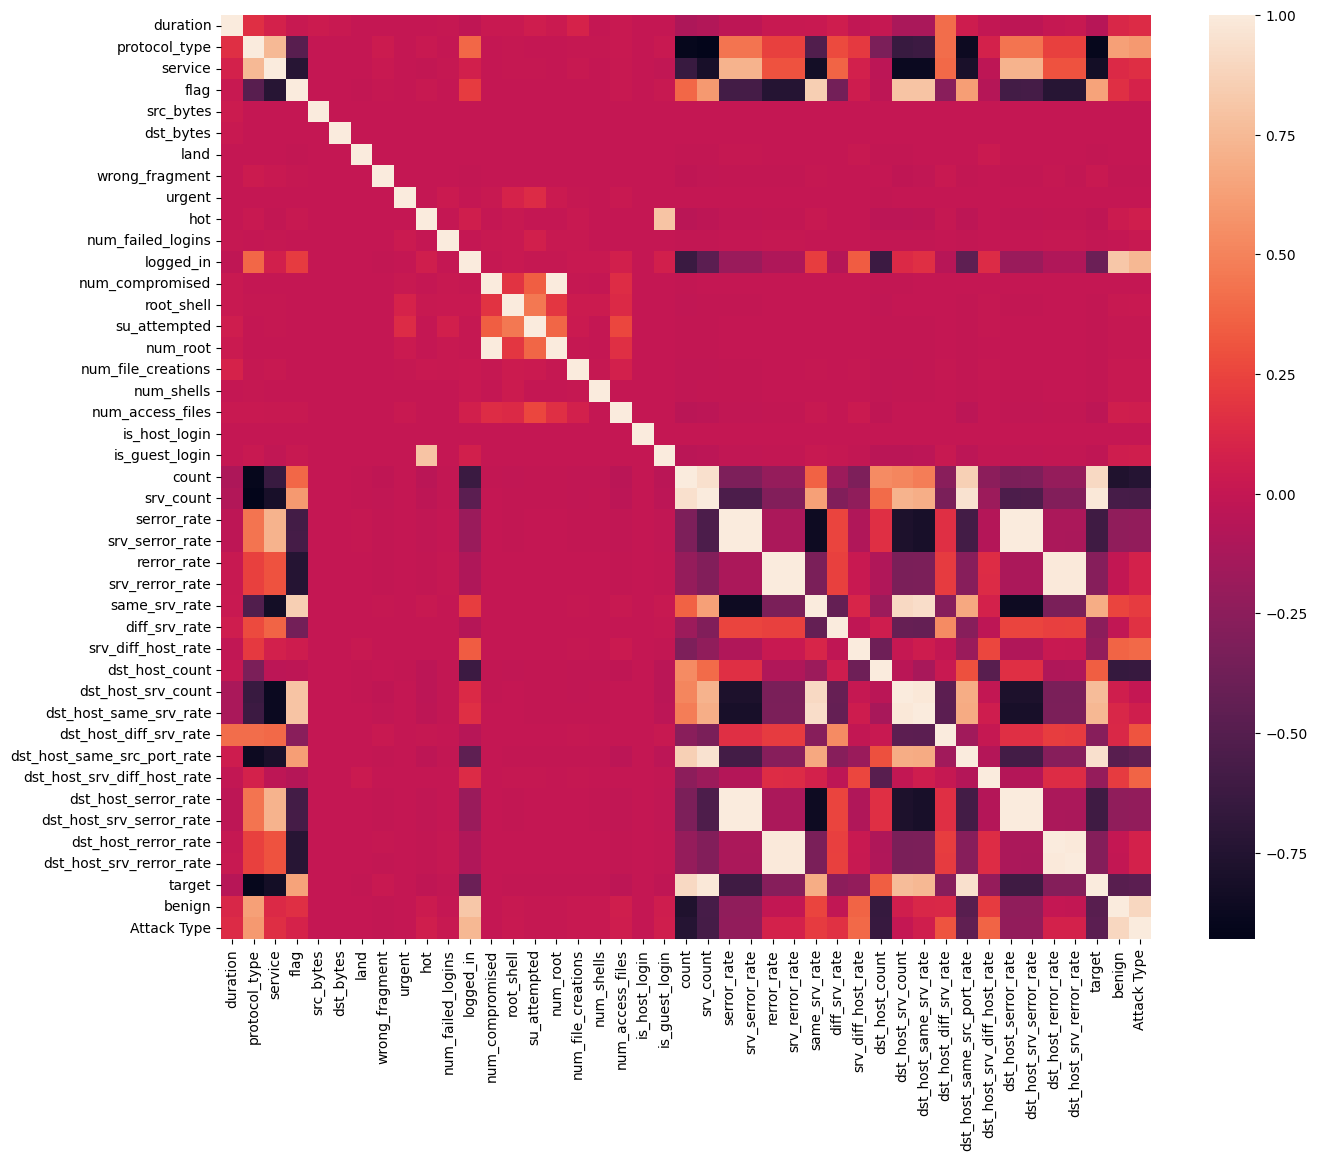

In [16]:
corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()


In [17]:
corr['target']

duration                      -0.060129
protocol_type                 -0.900354
service                       -0.826132
flag                           0.640245
src_bytes                     -0.000081
dst_bytes                     -0.001147
land                          -0.004711
wrong_fragment                 0.022741
urgent                        -0.001227
hot                           -0.019977
num_failed_logins             -0.007200
logged_in                     -0.400753
num_compromised               -0.002335
root_shell                    -0.009104
su_attempted                  -0.004376
num_root                      -0.003208
num_file_creations            -0.009367
num_shells                    -0.008385
num_access_files              -0.028080
is_host_login                 -0.000623
is_guest_login                -0.021724
count                          0.904942
srv_count                      0.980887
serror_rate                   -0.606982
srv_serror_rate               -0.606591


In [18]:
label_cols = ['target', 'Attack Type', 'benign']

mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
np.fill_diagonal(mask, True)
corr_matrix = corr.mask(mask)

threshold = 0.9

# Find features with correlation above the threshold
high_corr_features = ((corr_matrix.abs() > threshold) & (corr_matrix != 1)).any()

# Identify and remove redundant features
to_drop = high_corr_features[high_corr_features].index
to_drop = to_drop.drop(label_cols, errors='ignore')
# Drop the redundant features from the DataFrame
df = df.drop(columns=to_drop)
test_df = test_df.drop(columns=to_drop)
len(to_drop), to_drop

(13,
 Index(['protocol_type', 'num_compromised', 'count', 'srv_count', 'serror_rate',
        'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
        'dst_host_srv_count', 'dst_host_same_src_port_rate',
        'dst_host_serror_rate', 'dst_host_rerror_rate'],
       dtype='object'))

In [ ]:
# print(df.shape)

# for f,value in corr[label_col].items():
#   if abs(value) > 0.6 and f!=label_col:
#     df.drop(f,axis = 1, inplace=True)
#     print('dropped', f)
# df.shape

In [19]:
df['service'].corr(df[label_cols[0]])

-0.8261317653349612

In [21]:
df.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,srv_diff_host_rate,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate,target,benign,Attack Type
0,0,24,9,215,45076,0,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,16,1,1
1,0,24,9,162,4528,0,0,0,0,0,...,0.0,1,1.0,0.0,0.0,0.0,0.0,16,1,1
2,0,24,9,236,1228,0,0,0,0,0,...,0.0,2,1.0,0.0,0.0,0.0,0.0,16,1,1
3,0,24,9,233,2032,0,0,0,0,0,...,0.0,3,1.0,0.0,0.0,0.0,0.0,16,1,1
4,0,24,9,239,486,0,0,0,0,0,...,0.0,4,1.0,0.0,0.0,0.0,0.0,16,1,1


In [22]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

is_host_login                       0.000639
land                                0.002391
urgent                              0.007215
num_failed_logins                   0.007299
su_attempted                        0.008082
root_shell                          0.008257
num_shells                          0.008738
is_guest_login                      0.028887
num_access_files                    0.035510
dst_host_srv_diff_host_rate         0.041260
wrong_fragment                      0.042854
diff_srv_rate                       0.082715
dst_host_diff_srv_rate              0.108543
num_file_creations                  0.124186
srv_diff_host_rate                  0.140560
dst_host_srv_rerror_rate            0.230978
logged_in                           0.350612
dst_host_srv_serror_rate            0.382177
benign                              0.398939
dst_host_same_srv_rate              0.411186
Attack Type                         0.433234
hot                                 0.468978
flag      

In [23]:
df.to_csv(dataset('dataset.csv'), index=False)
test_df.to_csv(dataset('test_dataset.csv'), index=False)

# Load data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas

def dataset(file_name:str = ''):
  return f'dataset/{file_name}'

In [4]:
df = pandas.read_csv(dataset('dataset2.csv'))
test_df = pandas.read_csv(dataset('test_dataset.csv'))
df.shape

(4898431, 29)

In [111]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,2,50,9,105,146,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
1,0,2,50,9,105,146,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
2,0,2,50,9,105,146,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
3,0,2,50,9,105,146,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
4,0,2,50,9,105,146,0,0,0,0,...,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0


In [110]:
df.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,is_host_login,is_guest_login,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate
0,0,24,9,215,45076,0,0,0,0,0,...,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,0,24,9,162,4528,0,0,0,0,0,...,0,0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0
2,0,24,9,236,1228,0,0,0,0,0,...,0,0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0
3,0,24,9,233,2032,0,0,0,0,0,...,0,0,0.0,0.0,3,1.0,0.0,0.0,0.0,0.0
4,0,24,9,239,486,0,0,0,0,0,...,0,0,0.0,0.0,4,1.0,0.0,0.0,0.0,0.0


In [24]:
df = df.drop(['Attack Type','target'], axis=1)
test_df = test_df.drop(['Attack Type','target'], axis=1)

In [25]:
label_col = 'benign'
# Y = df[[label_col]]
# X = df.drop([label_col], axis=1)
Y_train = df[[label_col]]
X_train = df.drop([label_col], axis=1)
df = df.drop([label_col], axis=1)

In [26]:
Y_test = test_df[[label_col]]
X_test = test_df.drop([label_col], axis=1)
test_df = test_df.drop([label_col], axis=1)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=273)
print('Train', X_train.shape, Y_train.shape)
print('Validation', X_val.shape, Y_val.shape)
print('Test', X_test.shape, Y_test.shape)

Train (4408587, 27) (4408587, 1)
Validation (489844, 27) (489844, 1)
Test (311029, 27) (311029, 1)


In [35]:
def fit(model):
  name = type(model).__name__
  start_time = time.time()
  model.fit(X_train, Y_train.values.ravel())
  end_time = time.time()
  print(f"{name}: Training time: ",end_time-start_time)

def fit_evaluate(model):
  name = type(model).__name__
  fit(model)

  start_time = time.time()
  Y_test_pred1 = model.predict(X_test)
  end_time = time.time()
  print(f"{name}: Testing time: ",end_time-start_time)

  print(f"{name}: Train score is:", model.score(X_train, Y_train))
  print(f"{name}: Validation score is:", model.score(X_val,Y_val))
  print(f"{name}: Test score is:", model.score(X_test,Y_test))


In [36]:
from sklearn.naive_bayes import GaussianNB
fit_evaluate(GaussianNB())

GaussianNB: Training time:  1.3483672142028809
GaussianNB: Testing time:  0.10667109489440918
GaussianNB: Train score is: 0.9662864768235264
GaussianNB: Validation score is: 0.9664321702419546
GaussianNB: Test score is: 0.8981606216783644


In [37]:
from sklearn.tree import DecisionTreeClassifier
fit_evaluate(DecisionTreeClassifier(criterion="entropy", max_depth = 6))

DecisionTreeClassifier: Training time:  5.989065170288086
DecisionTreeClassifier: Testing time:  0.025421619415283203
DecisionTreeClassifier: Train score is: 0.9984326043696087
DecisionTreeClassifier: Validation score is: 0.9985321857570981
DecisionTreeClassifier: Test score is: 0.9216889743400133


In [42]:
from sklearn.svm import SVC
fit_evaluate(SVC(gamma = 'scale'))

In [40]:
from sklearn.linear_model import LogisticRegression
fit_evaluate(LogisticRegression(max_iter=1200000))

LogisticRegression: Training time:  7.488194704055786
LogisticRegression: Testing time:  0.007977485656738281
LogisticRegression: Train score is: 0.9856536799659392
LogisticRegression: Validation score is: 0.9857628142837311
LogisticRegression: Test score is: 0.9126930286243405


In [41]:
from sklearn.ensemble import GradientBoostingClassifier
fit_evaluate(GradientBoostingClassifier(random_state=220))

GradientBoostingClassifier: Training time:  407.0375714302063
GradientBoostingClassifier: Testing time:  0.2210860252380371
GradientBoostingClassifier: Train score is: 0.9992838975390528
GradientBoostingClassifier: Validation score is: 0.9992548648141041
GradientBoostingClassifier: Test score is: 0.9229428767092458


In [39]:
from sklearn.ensemble import RandomForestClassifier
fit_evaluate(RandomForestClassifier(n_estimators=30))

RandomForestClassifier: Training time:  59.26685619354248
RandomForestClassifier: Testing time:  0.23598957061767578
RandomForestClassifier: Train score is: 0.999963480362302
RandomForestClassifier: Validation score is: 0.9999040510856517
RandomForestClassifier: Test score is: 0.9239877953502728


In [38]:
from sklearn.ensemble import AdaBoostClassifier
fit_evaluate(AdaBoostClassifier(random_state=387))

c:\Users\rezaab\Projects\IntrusionDetection-KDD\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier: Training time:  114.25183916091919
AdaBoostClassifier: Testing time:  1.1632025241851807
AdaBoostClassifier: Train score is: 0.9976219137787232
AdaBoostClassifier: Validation score is: 0.9975910698099804
AdaBoostClassifier: Test score is: 0.9247015551604513


# NN

In [31]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from scikeras.wrappers import KerasClassifier
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.metrics import Accuracy
import gc

keras.backend.clear_session()

try:
  del kerasModel
  gc.collect()
  del ann
  gc.collect()
except:
  pass

kerasModel = Sequential(
	[
		Input(shape=(27,)),
		Dense(27,activation = 'relu',kernel_initializer='random_uniform'),
		Dense(10,activation='sigmoid',kernel_initializer='random_uniform'),
		Dense(2,activation='softmax'),

	]
)

kerasModel.compile(optimizer = 'adam', loss='categorical_crossentropy',metrics = ['accuracy'])

kerasModel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 27)             │           756 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,058 (4.13 KB)

 Trainable params: 1,058 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
Y_train.shape

(4408587, 1)

In [33]:
from keras.utils import to_categorical

ann = KerasClassifier(model=kerasModel, epochs=10, batch_size=64)
Y_train_one_hot = to_categorical(Y_train, num_classes=2)
Y_test_one_hot = to_categorical(Y_test, num_classes=2)
start_time = time.time()
ann.fit(X_train, Y_train_one_hot)
end_time = time.time()
print(f"ANN: Training time: ",end_time-start_time)

ann_train_pred = ann.predict(X_train)
ann_val_pred = ann.predict(X_val)
ann_test_pred = ann.predict(X_test)

ann_train_pred_scalar = np.argmax(ann_train_pred, axis=1)
ann_val_pred_scalar = np.argmax(ann_val_pred, axis=1)
ann_test_pred_scalar = np.argmax(ann_test_pred, axis=1)

print('Train accuracy:', accuracy_score(Y_train,ann_train_pred_scalar))
print('Val accuracy:', accuracy_score(Y_val,ann_val_pred_scalar))
print('Test accuracy:', accuracy_score(Y_test,ann_test_pred_scalar))

Epoch 1/10
68885/68885 ━━━━━━━━━━━━━━━━━━━━ 26s 373us/step - accuracy: 0.9845 - loss: 0.0540
Epoch 2/10
68885/68885 ━━━━━━━━━━━━━━━━━━━━ 26s 377us/step - accuracy: 0.9953 - loss: 0.0239
Epoch 3/10
68885/68885 ━━━━━━━━━━━━━━━━━━━━ 28s 401us/step - accuracy: 0.9963 - loss: 0.0184
Epoch 4/10
68885/68885 ━━━━━━━━━━━━━━━━━━━━ 30s 432us/step - accuracy: 0.9978 - loss: 0.0120
Epoch 5/10
68885/68885 ━━━━━━━━━━━━━━━━━━━━ 30s 430us/step - accuracy: 0.9979 - loss: 0.0104
Epoch 6/10
68885/68885 ━━━━━━━━━━━━━━━━━━━━ 29s 422us/step - accuracy: 0.9984 - loss: 0.0089
Epoch 7/10
68885/68885 ━━━━━━━━━━━━━━━━━━━━ 30s 427us/step - accuracy: 0.9984 - loss: 0.0085
Epoch 8/10
68885/68885 ━━━━━━━━━━━━━━━━━━━━ 30s 432us/step - accuracy: 0.9985 - loss: 0.0083
Epoch 9/10
68885/68885 ━━━━━━━━━━━━━━━━━━━━ 30s 433us/step - accuracy: 0.9986 - loss: 0.0079
Epoch 10/10
68885/68885 ━━━━━━━━━━━━━━━━━━━━ 30s 437us/step - accuracy: 0.9986 - loss: 0.0078
ANN: Training time:  289.93826508522034
68885/68885 ━━━━━━━━━━━━━━━━━